In [0]:
import numpy as np
import cv2
from scipy.stats import mode , skew , kurtosis
from matplotlib import pyplot as plt

Upando imagem Lena.pgm 

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Lena.pgm to Lena (1).pgm
User uploaded file "Lena.pgm" with length 609890 bytes


In [0]:
img = cv2.imread('Lena.pgm',0)                                            # lendo imagem em tons de cinza


In [0]:
def median_filter(image,n):
    output = np.zeros_like(image)                                          #cria matriz de zeros do tamanho da imagem
    output = np.dstack((output,output,output,output))                      #adiciona outra dimensao para armazenar todas as saidas em uma matriz
    padded_x = image.shape[0] + (n- 1)                                     #tamanho da imagem somado com n
    padded_y = image.shape[1] + (n - 1)                                    #tamanho da imagem somado com n
    image_padded = np.zeros((padded_x,padded_y))                           #"imagem aumentada" recebe zeros com tamanho da imagem + mascara
    w_x = int(np.ceil((n - 1)/2))                                          #valor inteiro do tamanho da mascara/2
    w_y = int(np.ceil((n - 1)/2))                                          #valor inteiro do tamanho da mascara/2
    image_padded[w_x:-w_x, w_y:-w_y] = image                               #recebe a imagem, deixando de fora o tamanho adicionado
    for x in range(image.shape[0]):                                        #percorre as posicoes x da matriz
        for y in range(image.shape[1]):                                    #percorre as posicoes y da matriz
            y_end = y+n                                                    #posicao y + tamanho da mascara
            x_end = x+n                                                    #posicao x + tamanho da mascara
            array = np.array(image_padded[x:x_end,y:y_end]).flatten()      #re arranja a matrix e forma de vetor
            output[x,y,0]=255*(np.average(array)>100)                      #filtro medio recebe tamanho medio dentre os limites da mascara
            output[x,y,1]=np.var(array)                                    #filtro var recebe variancia dentre os limites da mascara
            output[x,y,2]=skew(array)                                      #filtro skew recebe valor de skew dentre os limites da mascara
            output[x,y,3]=kurtosis(array)                                  #filtro kurtosis recebe valor de kurtosis dentre os limites da masca
    return output


In [0]:
grayImage = median_filter(img,5)

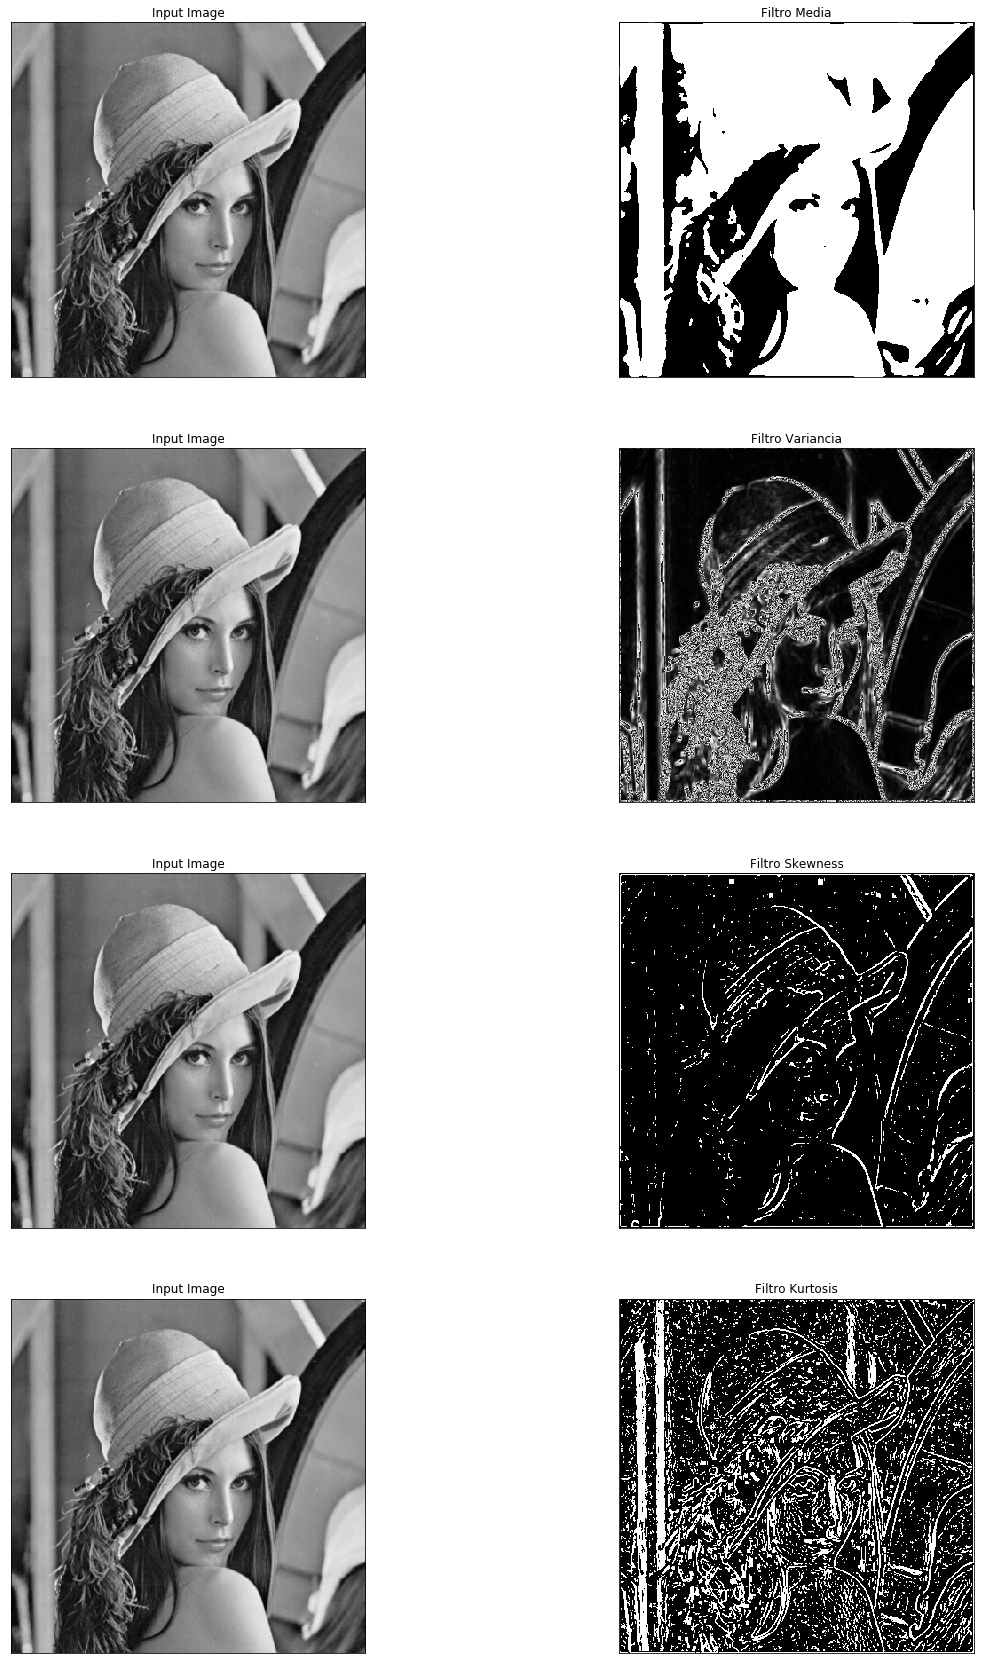

In [0]:
plt.figure(figsize=(20,30))
plt.subplot(421),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(422),plt.imshow(grayImage[:,:,0], cmap = 'gray')
plt.title('Filtro Media'), plt.xticks([]), plt.yticks([])
plt.subplot(423),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(424),plt.imshow(grayImage[:,:,1], cmap = 'gray')
plt.title('Filtro Variancia'), plt.xticks([]), plt.yticks([])
plt.subplot(425),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(426),plt.imshow(grayImage[:,:,2], cmap = 'gray')
plt.title('Filtro Skewness'), plt.xticks([]), plt.yticks([])
plt.subplot(427),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(428),plt.imshow(grayImage[:,:,3], cmap = 'gray')
plt.title('Filtro Kurtosis'), plt.xticks([]), plt.yticks([])
plt.show()